In [2]:
# Load MNIST Data

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist", one_hot=True)

X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

Extracting mnist\train-images-idx3-ubyte.gz
Extracting mnist\train-labels-idx1-ubyte.gz
Extracting mnist\t10k-images-idx3-ubyte.gz
Extracting mnist\t10k-labels-idx1-ubyte.gz


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


In [6]:
import matplotlib.pyplot as plt
def show_digit(index):
    label = y_train[index].argmax(axis=0)
    image = X_train[index].reshape([28,28])
    plt.title('Digit : {}'.format(label))
    plt.imshow(image, cmap='gray_r')
    plt.show()

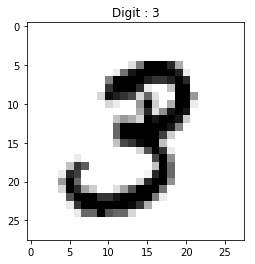

In [7]:
show_digit(1)

In [8]:
import numpy as np
import tensorflow as tf

# One Hot Encoding
a = [0,1,2,1]
num_labels = len(np.unique(a))
b = np.eye(num_labels)[a]
print(b)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]


In [10]:
# One Hot Decoding
a = tf.constant([[0,0,0,0,0,1,0,0,0,0]])
b = tf.argmax(a,axis=1)

sess = tf.Session()
print(sess.run(b))

[5]


170500096/170498071 [==============================] - 454s 3us/step


C:\Users\sudip\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


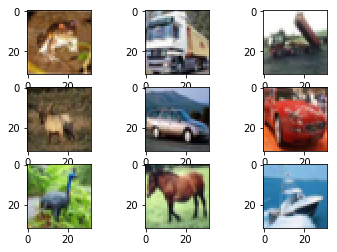

In [11]:
from tensorflow.python.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

import matplotlib.pyplot as plt
from scipy.misc import toimage
for i in range(0, 9):
    plt.subplot(3,3,i+1)
    plt.imshow(toimage(X_train[i]))
plt.show()

In [13]:
from tensorflow.python import keras

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [15]:
y_test[1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

### EX1: ML using Tensorflow

In [16]:
import tensorflow as tf
import numpy as np

# Generate fictitious data
N=100
X_train = np.linspace(-10,10,N)
c1 = np.random.normal(loc=-0.5, scale=0.2, size=N)
c2 = np.random.normal(loc=1.0, scale=0.2, size=N)
y_train = c1 * X_train + c2

In [17]:
# Setup Variable
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
W = tf.Variable([0.1],tf.float32)
b = tf.Variable([0.1],tf.float32)

In [18]:
# Step 2: Model
yhat = tf.multiply(W,X) + b

In [19]:
# # Step 3: Loss Function
loss = tf.reduce_mean(tf.square(yhat - y))

In [20]:
# # Step 4: Optimizer
train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [21]:
# # training data
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [22]:
# # Step 5: Training Loop
for i in range(1000):
    sess.run(train, {X:X_train, y:y_train})

In [23]:
# Step 6: Evaluation
W = sess.run(W)
b = sess.run(b)

print('W = {}, b={}'.format(W,b))

W = [-0.53416079], b=[ 1.04728782]


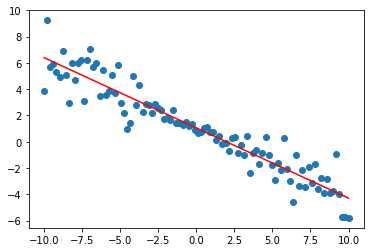

In [24]:
import matplotlib.pyplot as plt
plt.plot(X_train,y_train,'o')
plt.plot(X_train,W*X_train+b,'r')
plt.show()

### Ex2: Linear Regression with TF

In [25]:
import tensorflow as tf
import numpy as np

# Generate fictitious data
N=100
X_train = np.linspace(-10,10,N)
c1 = np.random.normal(loc=2, scale=0.2, size=N)
c2 = np.random.normal(loc=1.0, scale=0.2, size=N)
c3 = np.random.normal(loc=-1.0, scale=0.2, size=N)
y_train = c1*X_train*X_train + c2*X_train + c3

x = tf.placeholder(tf.float32)
W1 = tf.Variable([0.1],dtype=tf.float32)
W2 = tf.Variable([0.1],dtype=tf.float32)
b = tf.Variable([0.1],dtype=tf.float32)
y = tf.placeholder(tf.float32)

In [26]:
# Step 2 Model
yhat = W1*x*x+W2*x+b

# Step 3 Loss Function
loss = tf.reduce_mean(tf.square(yhat-y))

# Step 4 Optimizer
train =tf.train.GradientDescentOptimizer(0.00001).minimize(loss)

In [28]:
# Step 5 Training Loop
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(5000):
    sess.run(train,feed_dict={x:X_train,y:y_train})

In [29]:
# Step 6

W1 = sess.run(W1)
W2 = sess.run(W2)
b = sess.run(b)

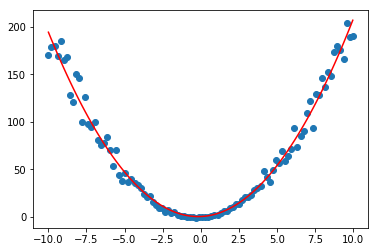

In [30]:
import matplotlib.pyplot as plt
plt.plot(X_train,y_train,'o')
plt.plot(X_train,W1*X_train*X_train+W2*X_train+b,'r')
plt.show()

### ML model for MNIST dataset

In [31]:
# Parameters
learning_rate = 0.001
batch_size = 100
tf.set_random_seed(25)

In [32]:
# Step 1: Initial Setup
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.truncated_normal([784, 10],stddev=0.1))
b = tf.Variable(tf.truncated_normal([10],stddev=0.1))

Extracting mnist\train-images-idx3-ubyte.gz
Extracting mnist\train-labels-idx1-ubyte.gz
Extracting mnist\t10k-images-idx3-ubyte.gz
Extracting mnist\t10k-labels-idx1-ubyte.gz


In [33]:
# Step 2: Setup Model
yhat = tf.matmul(X,W)+b

# Step 3: Cross Entropy Loss Functions
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=yhat))

# Step 4: Optimizer
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [34]:
# % of correct answer found in batches
is_correct = tf.equal(tf.argmax(y,1),tf.argmax(yhat,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [35]:
# Step 5: Training Loop
for i in range(5000):
    batch_X, batch_y = mnist.train.next_batch(batch_size)
    train_data = {X: batch_X, y: batch_y}
    sess.run(train, feed_dict=train_data)

    print(i+1, "Training accuracy =",sess.run(accuracy, feed_dict=train_data),
"Loss =",sess.run(loss, feed_dict=train_data))

1 Training accuracy = 0.07 Loss = 2.86129
2 Training accuracy = 0.14 Loss = 2.58555
3 Training accuracy = 0.14 Loss = 2.69366
4 Training accuracy = 0.14 Loss = 2.53634
5 Training accuracy = 0.18 Loss = 2.52794
6 Training accuracy = 0.15 Loss = 2.53728
7 Training accuracy = 0.26 Loss = 2.21153
8 Training accuracy = 0.18 Loss = 2.28506
9 Training accuracy = 0.21 Loss = 2.2578
10 Training accuracy = 0.18 Loss = 2.33307
11 Training accuracy = 0.22 Loss = 2.19888
12 Training accuracy = 0.23 Loss = 2.22489
13 Training accuracy = 0.29 Loss = 2.13521
14 Training accuracy = 0.24 Loss = 2.20757
15 Training accuracy = 0.28 Loss = 2.08752
16 Training accuracy = 0.37 Loss = 1.92847
17 Training accuracy = 0.3 Loss = 1.95846
18 Training accuracy = 0.31 Loss = 2.04716
19 Training accuracy = 0.27 Loss = 2.00822
20 Training accuracy = 0.38 Loss = 1.87219
21 Training accuracy = 0.37 Loss = 1.80545
22 Training accuracy = 0.37 Loss = 1.88614
23 Training accuracy = 0.39 Loss = 1.8785
24 Training accuracy = 

240 Training accuracy = 0.87 Loss = 0.532099
241 Training accuracy = 0.88 Loss = 0.511692
242 Training accuracy = 0.89 Loss = 0.44237
243 Training accuracy = 0.86 Loss = 0.449127
244 Training accuracy = 0.85 Loss = 0.514709
245 Training accuracy = 0.79 Loss = 0.623785
246 Training accuracy = 0.92 Loss = 0.464282
247 Training accuracy = 0.83 Loss = 0.704909
248 Training accuracy = 0.89 Loss = 0.49114
249 Training accuracy = 0.9 Loss = 0.463554
250 Training accuracy = 0.92 Loss = 0.433482
251 Training accuracy = 0.83 Loss = 0.589939
252 Training accuracy = 0.89 Loss = 0.480248
253 Training accuracy = 0.89 Loss = 0.438767
254 Training accuracy = 0.83 Loss = 0.564336
255 Training accuracy = 0.85 Loss = 0.637945
256 Training accuracy = 0.85 Loss = 0.597071
257 Training accuracy = 0.81 Loss = 0.620376
258 Training accuracy = 0.9 Loss = 0.457534
259 Training accuracy = 0.85 Loss = 0.57388
260 Training accuracy = 0.86 Loss = 0.607331
261 Training accuracy = 0.83 Loss = 0.508923
262 Training ac

484 Training accuracy = 0.89 Loss = 0.448851
485 Training accuracy = 0.77 Loss = 0.812785
486 Training accuracy = 0.86 Loss = 0.457918
487 Training accuracy = 0.92 Loss = 0.280249
488 Training accuracy = 0.91 Loss = 0.35715
489 Training accuracy = 0.9 Loss = 0.434903
490 Training accuracy = 0.88 Loss = 0.470763
491 Training accuracy = 0.82 Loss = 0.511757
492 Training accuracy = 0.86 Loss = 0.420659
493 Training accuracy = 0.87 Loss = 0.468644
494 Training accuracy = 0.9 Loss = 0.374301
495 Training accuracy = 0.88 Loss = 0.436911
496 Training accuracy = 0.86 Loss = 0.398345
497 Training accuracy = 0.91 Loss = 0.311373
498 Training accuracy = 0.88 Loss = 0.391876
499 Training accuracy = 0.92 Loss = 0.341773
500 Training accuracy = 0.84 Loss = 0.563195
501 Training accuracy = 0.92 Loss = 0.356808
502 Training accuracy = 0.88 Loss = 0.392763
503 Training accuracy = 0.91 Loss = 0.322213
504 Training accuracy = 0.87 Loss = 0.440543
505 Training accuracy = 0.91 Loss = 0.444531
506 Training 

698 Training accuracy = 0.91 Loss = 0.346828
699 Training accuracy = 0.91 Loss = 0.274204
700 Training accuracy = 0.92 Loss = 0.358798
701 Training accuracy = 0.89 Loss = 0.336991
702 Training accuracy = 0.89 Loss = 0.418651
703 Training accuracy = 0.87 Loss = 0.434193
704 Training accuracy = 0.93 Loss = 0.309254
705 Training accuracy = 0.88 Loss = 0.341787
706 Training accuracy = 0.9 Loss = 0.391291
707 Training accuracy = 0.88 Loss = 0.367133
708 Training accuracy = 0.89 Loss = 0.398692
709 Training accuracy = 0.93 Loss = 0.301537
710 Training accuracy = 0.89 Loss = 0.348018
711 Training accuracy = 0.9 Loss = 0.455913
712 Training accuracy = 0.89 Loss = 0.372745
713 Training accuracy = 0.93 Loss = 0.35731
714 Training accuracy = 0.88 Loss = 0.412573
715 Training accuracy = 0.89 Loss = 0.401788
716 Training accuracy = 0.94 Loss = 0.257154
717 Training accuracy = 0.87 Loss = 0.398052
718 Training accuracy = 0.92 Loss = 0.338166
719 Training accuracy = 0.88 Loss = 0.582334
720 Training 

936 Training accuracy = 0.9 Loss = 0.354312
937 Training accuracy = 0.92 Loss = 0.308548
938 Training accuracy = 0.91 Loss = 0.295736
939 Training accuracy = 0.94 Loss = 0.350266
940 Training accuracy = 0.92 Loss = 0.304334
941 Training accuracy = 0.95 Loss = 0.225079
942 Training accuracy = 0.88 Loss = 0.347614
943 Training accuracy = 0.91 Loss = 0.328262
944 Training accuracy = 0.93 Loss = 0.258846
945 Training accuracy = 0.88 Loss = 0.355656
946 Training accuracy = 0.9 Loss = 0.369626
947 Training accuracy = 0.85 Loss = 0.338572
948 Training accuracy = 0.93 Loss = 0.26601
949 Training accuracy = 0.87 Loss = 0.420484
950 Training accuracy = 0.92 Loss = 0.414815
951 Training accuracy = 0.86 Loss = 0.576923
952 Training accuracy = 0.91 Loss = 0.363856
953 Training accuracy = 0.9 Loss = 0.315659
954 Training accuracy = 0.91 Loss = 0.325032
955 Training accuracy = 0.89 Loss = 0.371791
956 Training accuracy = 0.91 Loss = 0.338141
957 Training accuracy = 0.92 Loss = 0.298264
958 Training a

1140 Training accuracy = 0.93 Loss = 0.248103
1141 Training accuracy = 0.91 Loss = 0.43971
1142 Training accuracy = 0.91 Loss = 0.374253
1143 Training accuracy = 0.89 Loss = 0.314697
1144 Training accuracy = 0.92 Loss = 0.237554
1145 Training accuracy = 0.89 Loss = 0.364946
1146 Training accuracy = 0.92 Loss = 0.3172
1147 Training accuracy = 0.92 Loss = 0.348573
1148 Training accuracy = 0.93 Loss = 0.245525
1149 Training accuracy = 0.93 Loss = 0.306034
1150 Training accuracy = 0.92 Loss = 0.30902
1151 Training accuracy = 0.95 Loss = 0.245805
1152 Training accuracy = 0.89 Loss = 0.351967
1153 Training accuracy = 0.96 Loss = 0.184889
1154 Training accuracy = 0.89 Loss = 0.387163
1155 Training accuracy = 0.82 Loss = 0.442991
1156 Training accuracy = 0.89 Loss = 0.293025
1157 Training accuracy = 0.94 Loss = 0.274869
1158 Training accuracy = 0.86 Loss = 0.415793
1159 Training accuracy = 0.93 Loss = 0.313676
1160 Training accuracy = 0.95 Loss = 0.261728
1161 Training accuracy = 0.93 Loss = 0

1381 Training accuracy = 0.89 Loss = 0.343195
1382 Training accuracy = 0.92 Loss = 0.316847
1383 Training accuracy = 0.97 Loss = 0.190778
1384 Training accuracy = 0.91 Loss = 0.39438
1385 Training accuracy = 0.96 Loss = 0.235893
1386 Training accuracy = 0.94 Loss = 0.363945
1387 Training accuracy = 0.85 Loss = 0.369044
1388 Training accuracy = 0.89 Loss = 0.41907
1389 Training accuracy = 0.91 Loss = 0.333746
1390 Training accuracy = 0.88 Loss = 0.324805
1391 Training accuracy = 0.97 Loss = 0.158316
1392 Training accuracy = 0.95 Loss = 0.281829
1393 Training accuracy = 0.97 Loss = 0.164248
1394 Training accuracy = 0.87 Loss = 0.403209
1395 Training accuracy = 0.92 Loss = 0.352933
1396 Training accuracy = 0.9 Loss = 0.545357
1397 Training accuracy = 0.93 Loss = 0.331095
1398 Training accuracy = 0.91 Loss = 0.270654
1399 Training accuracy = 0.97 Loss = 0.207758
1400 Training accuracy = 0.92 Loss = 0.353853
1401 Training accuracy = 0.93 Loss = 0.307703
1402 Training accuracy = 0.91 Loss = 

1570 Training accuracy = 0.95 Loss = 0.172679
1571 Training accuracy = 0.84 Loss = 0.41395
1572 Training accuracy = 0.89 Loss = 0.507378
1573 Training accuracy = 0.91 Loss = 0.339165
1574 Training accuracy = 0.92 Loss = 0.283889
1575 Training accuracy = 0.9 Loss = 0.346066
1576 Training accuracy = 0.94 Loss = 0.288707
1577 Training accuracy = 0.9 Loss = 0.387205
1578 Training accuracy = 0.92 Loss = 0.329877
1579 Training accuracy = 0.92 Loss = 0.245166
1580 Training accuracy = 0.91 Loss = 0.271168
1581 Training accuracy = 0.9 Loss = 0.28711
1582 Training accuracy = 0.94 Loss = 0.243272
1583 Training accuracy = 0.92 Loss = 0.393307
1584 Training accuracy = 0.94 Loss = 0.342635
1585 Training accuracy = 0.9 Loss = 0.442997
1586 Training accuracy = 0.85 Loss = 0.405295
1587 Training accuracy = 0.92 Loss = 0.27735
1588 Training accuracy = 0.92 Loss = 0.283224
1589 Training accuracy = 0.94 Loss = 0.206124
1590 Training accuracy = 0.97 Loss = 0.172656
1591 Training accuracy = 0.95 Loss = 0.24

1809 Training accuracy = 0.85 Loss = 0.383849
1810 Training accuracy = 0.91 Loss = 0.276826
1811 Training accuracy = 0.9 Loss = 0.35959
1812 Training accuracy = 0.94 Loss = 0.229377
1813 Training accuracy = 0.96 Loss = 0.194022
1814 Training accuracy = 0.88 Loss = 0.393453
1815 Training accuracy = 0.95 Loss = 0.190398
1816 Training accuracy = 0.92 Loss = 0.392725
1817 Training accuracy = 0.95 Loss = 0.229491
1818 Training accuracy = 0.95 Loss = 0.196938
1819 Training accuracy = 0.86 Loss = 0.323323
1820 Training accuracy = 0.87 Loss = 0.378761
1821 Training accuracy = 0.92 Loss = 0.418439
1822 Training accuracy = 0.92 Loss = 0.252555
1823 Training accuracy = 0.91 Loss = 0.361697
1824 Training accuracy = 0.93 Loss = 0.397344
1825 Training accuracy = 0.92 Loss = 0.300384
1826 Training accuracy = 0.93 Loss = 0.291464
1827 Training accuracy = 0.91 Loss = 0.302342
1828 Training accuracy = 0.92 Loss = 0.290916
1829 Training accuracy = 0.89 Loss = 0.291953
1830 Training accuracy = 0.93 Loss =

2013 Training accuracy = 0.94 Loss = 0.217523
2014 Training accuracy = 0.9 Loss = 0.381548
2015 Training accuracy = 0.94 Loss = 0.217234
2016 Training accuracy = 0.9 Loss = 0.338311
2017 Training accuracy = 0.89 Loss = 0.41053
2018 Training accuracy = 0.9 Loss = 0.413226
2019 Training accuracy = 0.9 Loss = 0.376381
2020 Training accuracy = 0.91 Loss = 0.360843
2021 Training accuracy = 0.91 Loss = 0.407254
2022 Training accuracy = 0.9 Loss = 0.340132
2023 Training accuracy = 0.93 Loss = 0.316852
2024 Training accuracy = 0.94 Loss = 0.257786
2025 Training accuracy = 0.92 Loss = 0.305487
2026 Training accuracy = 0.92 Loss = 0.235255
2027 Training accuracy = 0.89 Loss = 0.312681
2028 Training accuracy = 0.91 Loss = 0.354795
2029 Training accuracy = 0.94 Loss = 0.228544
2030 Training accuracy = 0.89 Loss = 0.356792
2031 Training accuracy = 0.92 Loss = 0.325866
2032 Training accuracy = 0.94 Loss = 0.171667
2033 Training accuracy = 0.91 Loss = 0.281137
2034 Training accuracy = 0.94 Loss = 0.2

2220 Training accuracy = 0.94 Loss = 0.216095
2221 Training accuracy = 0.92 Loss = 0.337534
2222 Training accuracy = 0.9 Loss = 0.375944
2223 Training accuracy = 0.9 Loss = 0.286949
2224 Training accuracy = 0.93 Loss = 0.222339
2225 Training accuracy = 0.94 Loss = 0.210977
2226 Training accuracy = 0.91 Loss = 0.310795
2227 Training accuracy = 0.95 Loss = 0.217153
2228 Training accuracy = 0.93 Loss = 0.268278
2229 Training accuracy = 0.96 Loss = 0.248618
2230 Training accuracy = 0.92 Loss = 0.301286
2231 Training accuracy = 0.93 Loss = 0.22795
2232 Training accuracy = 0.94 Loss = 0.211118
2233 Training accuracy = 0.89 Loss = 0.362181
2234 Training accuracy = 0.92 Loss = 0.279724
2235 Training accuracy = 0.92 Loss = 0.338487
2236 Training accuracy = 0.95 Loss = 0.241709
2237 Training accuracy = 0.92 Loss = 0.308902
2238 Training accuracy = 0.92 Loss = 0.381265
2239 Training accuracy = 0.92 Loss = 0.294514
2240 Training accuracy = 0.87 Loss = 0.349505
2241 Training accuracy = 0.88 Loss = 

2464 Training accuracy = 0.86 Loss = 0.573807
2465 Training accuracy = 0.98 Loss = 0.146857
2466 Training accuracy = 0.95 Loss = 0.18011
2467 Training accuracy = 0.92 Loss = 0.225817
2468 Training accuracy = 0.91 Loss = 0.319754
2469 Training accuracy = 0.93 Loss = 0.296507
2470 Training accuracy = 0.9 Loss = 0.316687
2471 Training accuracy = 0.92 Loss = 0.335294
2472 Training accuracy = 0.92 Loss = 0.257339
2473 Training accuracy = 0.82 Loss = 0.389523
2474 Training accuracy = 0.92 Loss = 0.245559
2475 Training accuracy = 0.91 Loss = 0.315709
2476 Training accuracy = 0.91 Loss = 0.326495
2477 Training accuracy = 0.9 Loss = 0.254696
2478 Training accuracy = 0.89 Loss = 0.319176
2479 Training accuracy = 0.91 Loss = 0.243844
2480 Training accuracy = 0.86 Loss = 0.335098
2481 Training accuracy = 0.96 Loss = 0.157041
2482 Training accuracy = 0.92 Loss = 0.218516
2483 Training accuracy = 0.89 Loss = 0.289517
2484 Training accuracy = 0.93 Loss = 0.302033
2485 Training accuracy = 0.97 Loss = 

2705 Training accuracy = 0.92 Loss = 0.272609
2706 Training accuracy = 0.95 Loss = 0.267334
2707 Training accuracy = 0.88 Loss = 0.457081
2708 Training accuracy = 0.91 Loss = 0.290478
2709 Training accuracy = 0.93 Loss = 0.305678
2710 Training accuracy = 0.89 Loss = 0.355908
2711 Training accuracy = 0.87 Loss = 0.474404
2712 Training accuracy = 0.97 Loss = 0.155136
2713 Training accuracy = 0.95 Loss = 0.26039
2714 Training accuracy = 0.89 Loss = 0.414692
2715 Training accuracy = 0.91 Loss = 0.293336
2716 Training accuracy = 0.97 Loss = 0.180935
2717 Training accuracy = 0.9 Loss = 0.26405
2718 Training accuracy = 0.9 Loss = 0.26959
2719 Training accuracy = 0.92 Loss = 0.321051
2720 Training accuracy = 0.9 Loss = 0.345909
2721 Training accuracy = 0.93 Loss = 0.234142
2722 Training accuracy = 0.94 Loss = 0.258734
2723 Training accuracy = 0.94 Loss = 0.243489
2724 Training accuracy = 0.89 Loss = 0.324677
2725 Training accuracy = 0.93 Loss = 0.273559
2726 Training accuracy = 0.9 Loss = 0.36

2902 Training accuracy = 0.92 Loss = 0.3035
2903 Training accuracy = 0.9 Loss = 0.24865
2904 Training accuracy = 0.91 Loss = 0.285265
2905 Training accuracy = 0.97 Loss = 0.138501
2906 Training accuracy = 0.93 Loss = 0.326572
2907 Training accuracy = 0.93 Loss = 0.217333
2908 Training accuracy = 0.88 Loss = 0.487038
2909 Training accuracy = 0.91 Loss = 0.310737
2910 Training accuracy = 0.93 Loss = 0.310858
2911 Training accuracy = 0.93 Loss = 0.273726
2912 Training accuracy = 0.88 Loss = 0.410091
2913 Training accuracy = 0.94 Loss = 0.264231
2914 Training accuracy = 0.93 Loss = 0.247844
2915 Training accuracy = 0.92 Loss = 0.350354
2916 Training accuracy = 0.87 Loss = 0.365666
2917 Training accuracy = 0.91 Loss = 0.303025
2918 Training accuracy = 0.94 Loss = 0.258856
2919 Training accuracy = 0.93 Loss = 0.276282
2920 Training accuracy = 0.96 Loss = 0.160284
2921 Training accuracy = 0.95 Loss = 0.283345
2922 Training accuracy = 0.85 Loss = 0.428908
2923 Training accuracy = 0.93 Loss = 0

3136 Training accuracy = 0.91 Loss = 0.266423
3137 Training accuracy = 0.91 Loss = 0.299625
3138 Training accuracy = 0.97 Loss = 0.215774
3139 Training accuracy = 0.91 Loss = 0.343357
3140 Training accuracy = 0.93 Loss = 0.287994
3141 Training accuracy = 0.95 Loss = 0.171076
3142 Training accuracy = 0.93 Loss = 0.2322
3143 Training accuracy = 0.87 Loss = 0.465367
3144 Training accuracy = 0.88 Loss = 0.304996
3145 Training accuracy = 0.88 Loss = 0.526557
3146 Training accuracy = 0.93 Loss = 0.364347
3147 Training accuracy = 0.93 Loss = 0.251391
3148 Training accuracy = 0.88 Loss = 0.376417
3149 Training accuracy = 0.9 Loss = 0.329516
3150 Training accuracy = 0.92 Loss = 0.308568
3151 Training accuracy = 0.93 Loss = 0.31118
3152 Training accuracy = 0.93 Loss = 0.223463
3153 Training accuracy = 0.93 Loss = 0.289252
3154 Training accuracy = 0.99 Loss = 0.128854
3155 Training accuracy = 0.94 Loss = 0.252668
3156 Training accuracy = 0.93 Loss = 0.27368
3157 Training accuracy = 0.9 Loss = 0.4

3369 Training accuracy = 0.92 Loss = 0.286874
3370 Training accuracy = 0.91 Loss = 0.259465
3371 Training accuracy = 0.94 Loss = 0.233601
3372 Training accuracy = 0.9 Loss = 0.315877
3373 Training accuracy = 0.94 Loss = 0.2697
3374 Training accuracy = 0.94 Loss = 0.246239
3375 Training accuracy = 0.94 Loss = 0.215761
3376 Training accuracy = 0.94 Loss = 0.210977
3377 Training accuracy = 0.89 Loss = 0.284388
3378 Training accuracy = 0.89 Loss = 0.308911
3379 Training accuracy = 0.94 Loss = 0.215226
3380 Training accuracy = 0.95 Loss = 0.262818
3381 Training accuracy = 0.9 Loss = 0.2422
3382 Training accuracy = 0.94 Loss = 0.192833
3383 Training accuracy = 0.91 Loss = 0.244529
3384 Training accuracy = 0.95 Loss = 0.163938
3385 Training accuracy = 0.93 Loss = 0.268602
3386 Training accuracy = 0.96 Loss = 0.139939
3387 Training accuracy = 0.94 Loss = 0.323976
3388 Training accuracy = 0.92 Loss = 0.241476
3389 Training accuracy = 0.92 Loss = 0.219306
3390 Training accuracy = 0.92 Loss = 0.3

3610 Training accuracy = 0.92 Loss = 0.430495
3611 Training accuracy = 0.84 Loss = 0.438882
3612 Training accuracy = 0.95 Loss = 0.204917
3613 Training accuracy = 0.91 Loss = 0.280814
3614 Training accuracy = 0.92 Loss = 0.211314
3615 Training accuracy = 0.96 Loss = 0.214875
3616 Training accuracy = 0.98 Loss = 0.113706
3617 Training accuracy = 0.93 Loss = 0.27689
3618 Training accuracy = 0.96 Loss = 0.203082
3619 Training accuracy = 0.92 Loss = 0.258623
3620 Training accuracy = 0.89 Loss = 0.326514
3621 Training accuracy = 0.92 Loss = 0.241163
3622 Training accuracy = 0.92 Loss = 0.229863
3623 Training accuracy = 0.93 Loss = 0.269242
3624 Training accuracy = 0.92 Loss = 0.286982
3625 Training accuracy = 0.92 Loss = 0.225369
3626 Training accuracy = 0.9 Loss = 0.351925
3627 Training accuracy = 0.92 Loss = 0.43717
3628 Training accuracy = 0.94 Loss = 0.268343
3629 Training accuracy = 0.91 Loss = 0.458109
3630 Training accuracy = 0.88 Loss = 0.367391
3631 Training accuracy = 0.95 Loss = 

3849 Training accuracy = 0.95 Loss = 0.213782
3850 Training accuracy = 0.89 Loss = 0.335436
3851 Training accuracy = 0.91 Loss = 0.285629
3852 Training accuracy = 0.9 Loss = 0.352116
3853 Training accuracy = 0.94 Loss = 0.247496
3854 Training accuracy = 0.85 Loss = 0.427759
3855 Training accuracy = 0.96 Loss = 0.157833
3856 Training accuracy = 0.95 Loss = 0.250264
3857 Training accuracy = 0.94 Loss = 0.248956
3858 Training accuracy = 0.96 Loss = 0.15589
3859 Training accuracy = 0.93 Loss = 0.258933
3860 Training accuracy = 0.92 Loss = 0.295905
3861 Training accuracy = 0.96 Loss = 0.227699
3862 Training accuracy = 0.9 Loss = 0.335884
3863 Training accuracy = 0.92 Loss = 0.257712
3864 Training accuracy = 0.93 Loss = 0.240166
3865 Training accuracy = 0.93 Loss = 0.236053
3866 Training accuracy = 0.93 Loss = 0.184125
3867 Training accuracy = 0.96 Loss = 0.218557
3868 Training accuracy = 0.91 Loss = 0.218781
3869 Training accuracy = 0.93 Loss = 0.252474
3870 Training accuracy = 0.93 Loss = 

4049 Training accuracy = 0.93 Loss = 0.284444
4050 Training accuracy = 0.9 Loss = 0.414999
4051 Training accuracy = 0.92 Loss = 0.248189
4052 Training accuracy = 0.88 Loss = 0.254117
4053 Training accuracy = 0.97 Loss = 0.153868
4054 Training accuracy = 0.92 Loss = 0.439224
4055 Training accuracy = 0.94 Loss = 0.22065
4056 Training accuracy = 0.9 Loss = 0.396494
4057 Training accuracy = 0.92 Loss = 0.241512
4058 Training accuracy = 0.95 Loss = 0.170542
4059 Training accuracy = 0.93 Loss = 0.1994
4060 Training accuracy = 0.94 Loss = 0.312918
4061 Training accuracy = 0.93 Loss = 0.186644
4062 Training accuracy = 0.95 Loss = 0.20905
4063 Training accuracy = 0.94 Loss = 0.217288
4064 Training accuracy = 0.9 Loss = 0.369302
4065 Training accuracy = 0.95 Loss = 0.23792
4066 Training accuracy = 0.94 Loss = 0.263947
4067 Training accuracy = 0.88 Loss = 0.421159
4068 Training accuracy = 0.94 Loss = 0.163644
4069 Training accuracy = 0.91 Loss = 0.275039
4070 Training accuracy = 0.9 Loss = 0.3845

4283 Training accuracy = 0.92 Loss = 0.269555
4284 Training accuracy = 0.9 Loss = 0.345817
4285 Training accuracy = 0.96 Loss = 0.205407
4286 Training accuracy = 0.95 Loss = 0.159328
4287 Training accuracy = 0.96 Loss = 0.303155
4288 Training accuracy = 0.93 Loss = 0.259341
4289 Training accuracy = 0.91 Loss = 0.405203
4290 Training accuracy = 0.91 Loss = 0.28261
4291 Training accuracy = 0.92 Loss = 0.343178
4292 Training accuracy = 0.98 Loss = 0.112996
4293 Training accuracy = 0.93 Loss = 0.195519
4294 Training accuracy = 0.9 Loss = 0.348056
4295 Training accuracy = 0.87 Loss = 0.363223
4296 Training accuracy = 0.94 Loss = 0.276953
4297 Training accuracy = 0.93 Loss = 0.258986
4298 Training accuracy = 0.95 Loss = 0.176497
4299 Training accuracy = 0.93 Loss = 0.303444
4300 Training accuracy = 0.93 Loss = 0.183066
4301 Training accuracy = 0.93 Loss = 0.242424
4302 Training accuracy = 0.93 Loss = 0.174395
4303 Training accuracy = 0.87 Loss = 0.422969
4304 Training accuracy = 0.9 Loss = 0

4483 Training accuracy = 0.93 Loss = 0.227216
4484 Training accuracy = 0.98 Loss = 0.112968
4485 Training accuracy = 0.92 Loss = 0.242283
4486 Training accuracy = 0.95 Loss = 0.272617
4487 Training accuracy = 0.93 Loss = 0.26395
4488 Training accuracy = 0.91 Loss = 0.190839
4489 Training accuracy = 0.93 Loss = 0.238046
4490 Training accuracy = 0.89 Loss = 0.352458
4491 Training accuracy = 0.94 Loss = 0.285773
4492 Training accuracy = 0.95 Loss = 0.303955
4493 Training accuracy = 0.86 Loss = 0.336773
4494 Training accuracy = 0.94 Loss = 0.239577
4495 Training accuracy = 0.98 Loss = 0.163242
4496 Training accuracy = 0.91 Loss = 0.358405
4497 Training accuracy = 0.94 Loss = 0.205658
4498 Training accuracy = 0.93 Loss = 0.288644
4499 Training accuracy = 0.95 Loss = 0.188014
4500 Training accuracy = 0.92 Loss = 0.273263
4501 Training accuracy = 0.89 Loss = 0.336041
4502 Training accuracy = 0.95 Loss = 0.402468
4503 Training accuracy = 0.91 Loss = 0.281929
4504 Training accuracy = 0.91 Loss 

4725 Training accuracy = 0.91 Loss = 0.328969
4726 Training accuracy = 0.91 Loss = 0.351798
4727 Training accuracy = 0.87 Loss = 0.374258
4728 Training accuracy = 0.93 Loss = 0.231377
4729 Training accuracy = 0.95 Loss = 0.167736
4730 Training accuracy = 0.86 Loss = 0.320109
4731 Training accuracy = 0.91 Loss = 0.249001
4732 Training accuracy = 0.97 Loss = 0.166039
4733 Training accuracy = 0.92 Loss = 0.228846
4734 Training accuracy = 0.96 Loss = 0.213269
4735 Training accuracy = 0.93 Loss = 0.181909
4736 Training accuracy = 0.91 Loss = 0.256913
4737 Training accuracy = 0.95 Loss = 0.235052
4738 Training accuracy = 0.94 Loss = 0.223236
4739 Training accuracy = 0.93 Loss = 0.191688
4740 Training accuracy = 0.94 Loss = 0.318904
4741 Training accuracy = 0.92 Loss = 0.334212
4742 Training accuracy = 0.91 Loss = 0.30325
4743 Training accuracy = 0.95 Loss = 0.204188
4744 Training accuracy = 0.94 Loss = 0.196017
4745 Training accuracy = 0.93 Loss = 0.231697
4746 Training accuracy = 0.92 Loss 

4951 Training accuracy = 0.93 Loss = 0.2235
4952 Training accuracy = 0.87 Loss = 0.341844
4953 Training accuracy = 0.92 Loss = 0.303735
4954 Training accuracy = 0.93 Loss = 0.288268
4955 Training accuracy = 0.97 Loss = 0.154861
4956 Training accuracy = 0.94 Loss = 0.276525
4957 Training accuracy = 0.91 Loss = 0.350061
4958 Training accuracy = 0.92 Loss = 0.235798
4959 Training accuracy = 0.88 Loss = 0.523229
4960 Training accuracy = 0.93 Loss = 0.250475
4961 Training accuracy = 0.92 Loss = 0.340418
4962 Training accuracy = 0.95 Loss = 0.203087
4963 Training accuracy = 0.95 Loss = 0.271896
4964 Training accuracy = 0.93 Loss = 0.356121
4965 Training accuracy = 0.96 Loss = 0.173905
4966 Training accuracy = 0.97 Loss = 0.153215
4967 Training accuracy = 0.96 Loss = 0.147282
4968 Training accuracy = 0.92 Loss = 0.240326
4969 Training accuracy = 0.91 Loss = 0.326726
4970 Training accuracy = 0.93 Loss = 0.262448
4971 Training accuracy = 0.97 Loss = 0.158556
4972 Training accuracy = 0.94 Loss =

In [36]:
# Step 6: Evaluation
test_data = {X:mnist.test.images,y:mnist.test.labels}
print("Testing accuracy = ",sess.run(accuracy, feed_dict=test_data))

Testing accuracy =  0.9253
